# <div class='alert alert-block alert-success'>Module 7 HW - Question 1</div>

<div class='alert alert-block alert-info'>Implement k-means from scratch. You are given a dataset X whose rows represent different data points, you are asked to perform a k-means clustering on this dataset using the Manhattan Distance, k is chosen as 3.

$$X = \begin{bmatrix} 5.7 & 64 \\ 4.7 & 58 \\ 6.1 & 56 \\ 4.6 & 64 \\ 5.4 & 84 \\ 4.9 & 60 \\ 5.0 & 62 \\ 6.4 & 62 \\ 5.1 & 76 \\ 6.0 & 60 \\ \end{bmatrix}$$

The Manhattan Distance of $(x_1,y_1)$ and $(x_2,y_2)$ is calculated by

$\text{Dist} = |x_1-x_2|+|y_1- y_2 |$


</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 1.a</div>

<div class='alert alert-block alert-info'>Since first column and second column are not on the same scale. Before running K-means, this dataset needs to be preprocessed, Show the preprocessed dataset. (Answer in the format of [x1, x2], round your results to two decimal places, same as problems b and c)</div>

We will conduct normalization on the dataset in order to be sure that the values are on the same scale. We will use Min-Max Scaling($x_{\text{normalized}} = \frac{x - min(x)}{max(x) - min(x)}$) to conduct the normalization on the data. This normalization will scale the first feature data and second feature data to values between 0 and 1. 

In [14]:
# import required packages
import numpy as np
import copy

# set the data into an array
X = np.array([
    [5.7, 64],
    [4.7, 58],
    [6.1, 56],
    [4.6, 64],
    [5.4, 84],
    [4.9, 60],
    [5.0, 62],
    [6.4, 62],
    [5.1, 76],
    [6.0, 60]
])

# define a function for min max scaling
def min_max_scale(X):

    X_pp = copy.deepcopy(X)
    for col in range(X.shape[1]):
        for row in range(len(X)):
            X_pp[row, col] = (X[row, col] - X[:, col].min())/(X[:, col].max() - X[:, col].min())
    
    return X_pp

[[0.61111111 0.28571429]
 [0.05555556 0.07142857]
 [0.83333333 0.        ]
 [0.         0.28571429]
 [0.44444444 1.        ]
 [0.16666667 0.14285714]
 [0.22222222 0.21428571]
 [1.         0.21428571]
 [0.27777778 0.71428571]
 [0.77777778 0.14285714]]


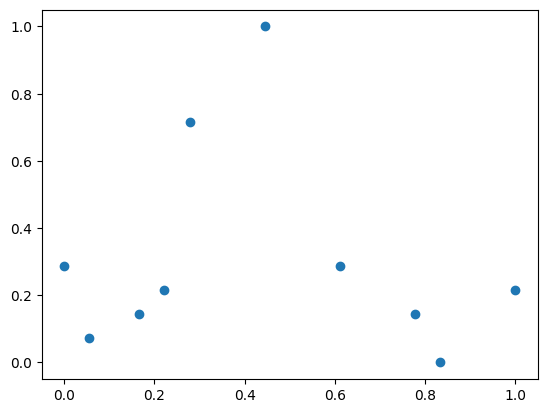

In [41]:
# import plotting packages
import matplotlib.pyplot as plt

# apply min max scaling to our data
X_pp = min_max_scale(X)
print(X_pp)

# plot the normalized data
plt.scatter(X_pp[:, 0], X_pp[:, 1])
plt.show()

# <div class='alert alert-block alert-success'>Module 7 HW - Question 1.b</div>

<div class='alert alert-block alert-info'>

Suppose the initial centroids of the clusters are $\mu_1=[5.6,60]$, $\mu_2=[5.9,60]$, $\mu_3=[5.2,75]$ . What’s the center of the second cluster after two iterations?

</div>

These centroids need to be normalized first. Once they are normalized then we can calculate the first iteration of manhattan distances between each value and the centroids to determine which values lie closest to each centroid. Once we identify those values we can then calculate the mean distances in order to find the second clusters/centroids.

c1 preprocessed:  [[0.55555556 0.14285714]]
c2 preprocessed:  [[0.72222222 0.14285714]]
c3 preprocessed:  [[0.33333333 0.67857143]]


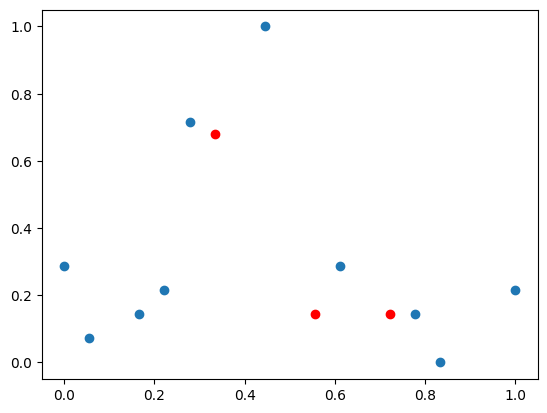

In [61]:
# set un-normalized centroids in arrays
c1 = np.array([[5.6, 60]])
c2 = np.array([[5.9, 60]])
c3 = np.array([[5.2, 75]])

# set min and max values for each column of the dataset.
X_0_min = X[:, 0].min()
X_0_max = X[:, 0].max()
X_1_min = X[:, 1].min()
X_1_max = X[:, 1].max()

# standardize data based on original data
c1_pp = np.array([
    [(c1[0, 0]-X_0_min)/(X_0_max-X_0_min), (c1[0, 1]-X_1_min)/(X_1_max-X_1_min)]
])

c2_pp = np.array([
    [(c2[0, 0]-X_0_min)/(X_0_max-X_0_min), (c2[0, 1]-X_1_min)/(X_1_max-X_1_min)]
])

c3_pp = np.array([
    [(c3[0, 0]-X_0_min)/(X_0_max-X_0_min), (c3[0, 1]-X_1_min)/(X_1_max-X_1_min)]
])

# print the results
print('c1 preprocessed: ', c1_pp)
print('c2 preprocessed: ', c2_pp)
print('c3 preprocessed: ', c3_pp)

# plot the normalized centroids
plt.scatter(X_pp[:, 0], X_pp[:, 1])
plt.scatter(np.array([c1_pp[0], c2_pp[0], c3_pp[0]])[:, 0], np.array([c1_pp[0], c2_pp[0], c3_pp[0]])[:, 1], color='red')
plt.show()

Now we can calculate the manhatten distance of the centroids between each point and determine which points are closests to each centroid.

normalized array with centroid category set using Manhatten Distances
[[0.61111111 0.28571429 1.        ]
 [0.05555556 0.07142857 1.        ]
 [0.83333333 0.         2.        ]
 [0.         0.28571429 1.        ]
 [0.44444444 1.         3.        ]
 [0.16666667 0.14285714 1.        ]
 [0.22222222 0.21428571 1.        ]
 [1.         0.21428571 2.        ]
 [0.27777778 0.71428571 3.        ]
 [0.77777778 0.14285714 2.        ]]


Initial Centroids
{1: array([[0.55555556, 0.14285714]]), 2: array([[0.72222222, 0.14285714]]), 3: array([[0.33333333, 0.67857143]])} 


1 Iteration: New Centroids
{1: array([[0.21111111, 0.2       ]]), 2: array([[0.87037037, 0.11904762]]), 3: array([[0.36111111, 0.85714286]])} 


1 Iteration: Centroid Distance Values
{1: 0.40476190476190443, 2: 0.05555555555555536, 3: 0.0912698412698415} 




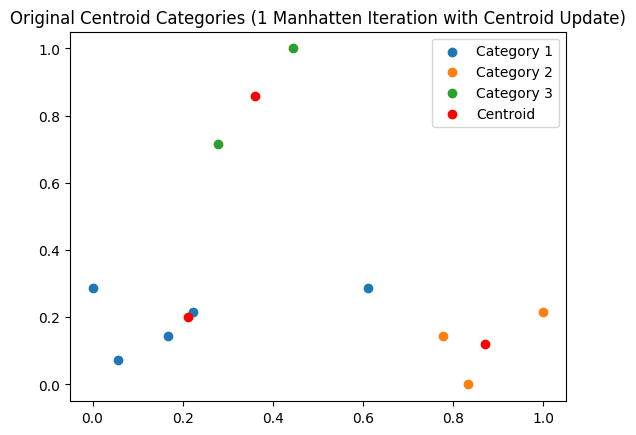

In [167]:
# creating a centroids dictionary to iterate through preprocessed centroid data
cent_dict = {1: c1_pp, 2: c2_pp, 3: c3_pp}

# manhatten distance calculations and new centroid locations
def manhattan_dist_calc(X, centroids_dict):

    # copy array to return newly created array with centroid and remove cluster label if it is available in the dataset
    X_md = copy.deepcopy(X)
    X_md = X_md[:, 0:2]
    X_md = np.hstack((X_md, np.zeros((X_md.shape[0], 1))))

    # dictionary to hold centroid distance values to answer question 1.b
    centroid_distance_values = {}

    # check the distance of each point in the array from each centroid and appoint the smallest value 
    for row in range(len(X)):
        # used to hold manhatten distance values for each centroid
        temp_cent_dict_ = {}
        for dict_name in centroids_dict:
            # calculate the manhatten distance for the centroid
            temp_cent_dict_.update({dict_name: abs(X[row, 0] - centroids_dict[dict_name][0][0]) + np.abs(X[row, 1] - centroids_dict[dict_name][0][1])})
        
        # get minimum valued centroid to set as label for that cluster
        min_centroid = min(zip(temp_cent_dict_.values(), temp_cent_dict_.keys()))[1]
        centroid_distance_values.update({min(zip(temp_cent_dict_.values(), temp_cent_dict_.keys()))[1]: min(zip(temp_cent_dict_.values(), temp_cent_dict_.keys()))[0]})
        X_md[row, 2] = min_centroid

    # calculate new centroids
    # list of unique centroid categories
    centroid_cat = np.unique(X_md[:, 2])

    # empty array that will hold our new centroids
    centroid_array = np.zeros((len(np.unique(X_md[:, 2])), 2))

    # updating the centroids dictionary so we can re-run this function to find convergence
    centroids_dict_copy = copy.deepcopy(centroids_dict)

    # loop to iterate through data and calculate centroid means
    for num, cent_cat in enumerate(centroid_cat):
        X_cent_mean = X_labeled[X_labeled[:, 2] == cent_cat][:, 0].mean()
        y_cent_mean = X_labeled[X_labeled[:, 2] == cent_cat][:, 1].mean()

        # setting centroid means into a centroid array that will be used for visualizations
        centroid_array[num, 0] = X_cent_mean
        centroid_array[num, 1] = y_cent_mean

        # setting centroid means into a new dictioanry that we will use for iterations
        centroids_dict_copy[cent_cat] = np.array([[X_cent_mean, y_cent_mean]])


    return X_md, centroid_array, centroids_dict_copy, centroid_distance_values

X_labeled, cent_array1, new_cent_dict1, centroid_distance_values1 = manhattan_dist_calc(X_pp, cent_dict)

print('normalized array with centroid category set using Manhatten Distances')
print(X_labeled)

print('\n\nInitial Centroids')
print(cent_dict, '\n\n')

print('1 Iteration: New Centroids')
print(new_cent_dict1, '\n\n')

print('1 Iteration: Centroid Distance Values')
print(centroid_distance_values1, '\n\n')

# extracting x, y, and category values
x = X_labeled[:, 0]
y = X_labeled[:, 1]
categories = X_labeled[:, 2]

# get unique categories
unique_categories = np.unique(categories)

# plot each category
for category in unique_categories:
    # select data for the category
    idx = categories == category
    plt.scatter(x[idx], y[idx], label=f'Category {int(category)}')
plt.scatter(cent_array1[:, 0], cent_array1[:, 1], color='red', label='Centroid')
plt.legend()
plt.title('Original Centroid Categories (1 Manhatten Iteration with Centroid Update)')
plt.show()

Initial Centroids
{1: array([[0.55555556, 0.14285714]]), 2: array([[0.72222222, 0.14285714]]), 3: array([[0.33333333, 0.67857143]])} 


1 Iteration: New Centroids
{1: array([[0.21111111, 0.2       ]]), 2: array([[0.87037037, 0.11904762]]), 3: array([[0.36111111, 0.85714286]])} 


2 Iteration: New Centroids
{1: array([[0.21111111, 0.2       ]]), 2: array([[0.87037037, 0.11904762]]), 3: array([[0.36111111, 0.85714286]])} 


2 Iteration: Centroid Distance Values
{2: 0.11640211640211638, 1: 0.025396825396825362, 3: 0.22619047619047639} 




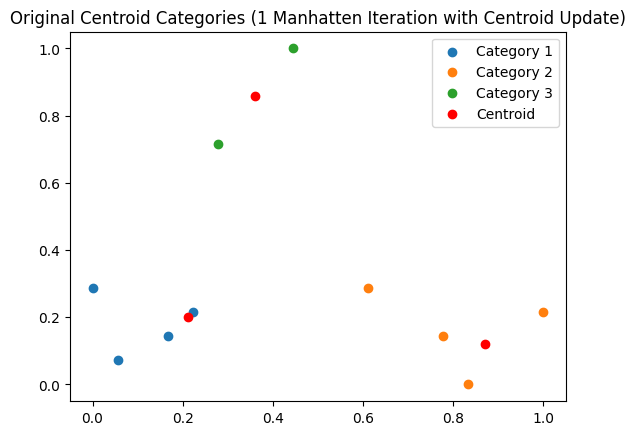

In [168]:
print('Initial Centroids')
print(cent_dict, '\n\n')

print('1 Iteration: New Centroids')
print(new_cent_dict1, '\n\n')

X_labeled2, cent_array2, new_cent_dict2, centroid_distance_values2 = manhattan_dist_calc(X_pp, new_cent_dict1)

print('2 Iteration: New Centroids')
print(new_cent_dict2, '\n\n')

print('2 Iteration: Centroid Distance Values')
print(centroid_distance_values2, '\n\n')

# extracting x, y, and category values
x = X_labeled2[:, 0]
y = X_labeled2[:, 1]
categories = X_labeled2[:, 2]

# get unique categories
unique_categories = np.unique(categories)

# plot each category
for category in unique_categories:
    # select data for the category
    idx = categories == category
    plt.scatter(x[idx], y[idx], label=f'Category {int(category)}')
plt.scatter(cent_array2[:, 0], cent_array2[:, 1], color='red', label='Centroid')
plt.legend()
plt.title('Original Centroid Categories (1 Manhatten Iteration with Centroid Update)')
plt.show()

**After two iterations the centroid of the second cluster is at [0.87, 0.12]**

# <div class='alert alert-block alert-success'>Module 7 HW - Question 1.c</div>

<div class='alert alert-block alert-info'>

What’s the center of the third cluster when the clustering converges?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 1.d</div>

<div class='alert alert-block alert-info'>

How many iterations are required for the clusters to converge?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 2</div>

<div class='alert alert-block alert-info'>

Suppose there are two clusters A (red) and B (blue), each has four members and plotted in Figure below, compute the distance between two clusters using Euclidean distance.

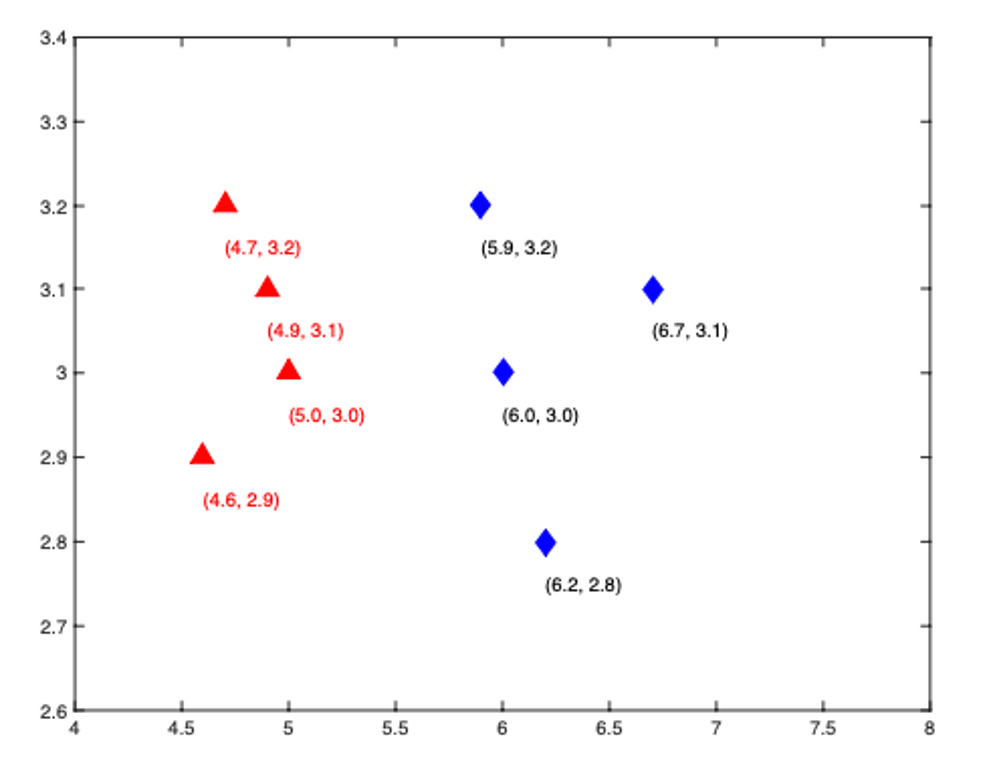

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 2.a</div>

<div class='alert alert-block alert-info'>

What is the distance between the two farthest members (Complete-link) (round to four decimal places here, and next 2 problems)?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 2.b</div>

<div class='alert alert-block alert-info'>

What is the distance between the two closest members (Single-link)?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 2.c</div>

<div class='alert alert-block alert-info'>

What is the average distance between all pairs (Average-link)?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 2.d</div>

<div class='alert alert-block alert-info'>

Among all three distances above, which one is robust to noise?

</div>

# <div class='alert alert-block alert-success'>Module 7 HW - Question 3</div>
<div class='alert alert-block alert-info'>Fill out the code cells in hw_7.ipynb and answer the questions.</div>

# Unsupervised Learning - Clustering

We've shown several unsupervised learning algorithms in this unit,  We first introduced the simplest clustering algorihtm k-means.  Hierarchical clustering included agglomerative and divisive clustering algorithms. Finally we discussed a powerful density-based algorihtm DBSCAN that performs fairly well when the clusters have irregular shapes, In this coding assignment you will explore more clustering algorithms and become familiar with the sklearn's clustering package. You'll also need to tune the hyper parameters of these models and get a sense about how the hyperparameters influence the shape of resulting clusters. 



## Loading the Dataset

Load dataset with different cluster shapes and try algorithms on them.

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time
import warnings

In [ ]:
n_samples = 1500
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
random_state = 170
X_blobs1, y_blobs1 = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_blobs1, transformation)
aniso = (X_aniso, y_blobs1)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

## Grouping objects by similarity using k-means

K-means algorithm is simple but it performs poorly to enlongated clusters, or manifolds with irregular shapes.

In [ ]:
def print_cluster(model, n_clusters, X):
    y_km = model.fit_predict(X)
    color_list = ['lightgreen', 'orange', 'lightblue', 'red', 'yellow', 'brown', 'cyan']
    for i in range(n_clusters):
        plt.scatter(X[y_km == i, 0],
        X[y_km == i, 1],
        s=50,
        c=color_list[i],
        marker='s',
        label='cluster ' + str(i))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [ ]:

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [ ]:
print_cluster(km, 3, X_blobs)

## Using the elbow method to find the optimal number of clusters

In [ ]:
def plot_distortions(data):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_distortions(X_blobs)

In [ ]:
# TODO :: run the kmeans on the other datasets and use elbow method to select the number of clusters.



## Hierarchical clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

## Agglomerative Clustering 

The algorithm performs a hierarchical clustering using a bottom up approach. Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. 

In [ ]:
from itertools import cycle, islice

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    ((X_blobs, y_blobs), {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
import time as time
import numpy as np
import pylab as pl
import mpl_toolkits.mplot3d.axes3d as p3

###############################################################################
# Generate data (swiss roll dataset)
n_samples = 1000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
        n_clusters=6, linkage='ward')
ward.fit(X)
if hasattr(algorithm, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print ("Elapsed time: {}".format(time.time() - st))

###############################################################################
# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(np.float(l) / np.max(label + 1)))
pl.title('Without connectivity constraints')

###############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
        n_clusters=6, linkage='ward', connectivity=connectivity)
ward.fit(X)
if hasattr(algorithm, 'labels_'):
    label = ward.labels_.astype(np.int)
else:
    label = ward.predict(X)
print ("Elapsed time: {}".format(time.time() - st))

###############################################################################
# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=pl.cm.jet(float(l) / np.max(label + 1)))
pl.title('With connectivity constraints')

pl.show()

## Question 1

Based on the code above, what is the difference between the two models? Which one performs better and why?



## DBSCAN algorithm

As opposed to k-means algorithm which assumes that clusters are convex shape, DBSCAN views clusters as areas of high density separated by areas of low density. 

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_blobs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_blobs, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_blobs, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_blobs, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_blobs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_blobs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(noisy_moons[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_moons[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_moons[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(noisy_circles[0])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = noisy_circles[0][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = noisy_circles[0][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Question 2

eps and min_samples are two important parameters for the DBSCAN model.  What are those two parameters? Tune the parameters of the model for noisy_circles and noisy_moon dataset to make it separate the clusters perfectly.

## Mean-Shift Algorithm

Similiar to K-means, Mean shift algorithm locates the centroids of the clusters by shifting the points to density function maxima. Here is the procedure of the algorithm.


1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.

2. For each datapoint x ∈ X, calculate the mean shift m(x).

3. For each datapoint x ∈ X, update x ← m(x).

4. Repeat 1. for n_iterations or until the points are almost not moving or not moving.

In [ ]:
import math

def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

In [ ]:
n_samples = 150
X_blobs, y_blobs = make_blobs(n_samples= n_samples, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
original_data = X_blobs
# freeze the original points and make a copy
copy_points = np.copy(original_data)

look_distance = 1  # How far to look for neighbours.
kernel_bandwidth = 8  # Kernel parameter.
# a list to save the history move to do the visualization
past_X = []
n_iteration = 3
for i in range(n_iteration):
    
    for index, x in enumerate(copy_points):
        
        # for each datapoint x, find the neighbouring points N(x) of x
        neighbors = neighbourhood_points(copy_points, x, look_distance)
        # calculate the mean shift m(x)
         
        denominator = 0
        nominator = 0
        for n in neighbors:
            weight = gaussian_kernel(euclid_distance(x, n), kernel_bandwidth)
            nominator += weight * n
            denominator += weight
        new_x = nominator/(denominator+1e-4)
        copy_points[index] = new_x
    past_X.append(np.copy(copy_points))
         
       

In [ ]:
figure = plt.figure(1)
figure.set_size_inches((7, 20))
plt.subplot(n_iteration+2, 1, 1)
plt.title('Initial state')
plt.plot(original_data[:,0], original_data[:,1], 'bo')
plt.plot(original_data[:,0], original_data[:,1], 'ro')

for i in range(n_iteration):
    figure_index = i + 2
    plt.subplot(n_iteration+2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_data[:,0], original_data[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')
plt.show()

## Question 3

look_distance and kernel_bandwidth are two important parameters for mean shift algorithm. kernel_bandwidth simply determines the size of neighborhood over which the density will be computed. look_distance determines the region to look at when searching the surrounding neighbors. Tune these two parameters to make the cluster centroids exactly 3 for the above dataset. What is proper look_distance and kernel_bandwidth in your setting?

## Question 4

Apply any of these algorithms to your favorite dataset.  Possible applications of clustering algorihtm will include but not be limited to image segmentation and outlier detection.
